# 1. Membaca Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Mengimport library pandas untuk membaca dataset
import pandas as pd
import matplotlib.pyplot as plt

# baca dataset csv menggunakan syntax pd.read_csv()
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dibimbing Camp/Day 3/Warehouse_and_Retail_Sales.csv')

In [7]:
df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.00
...,...,...,...,...,...,...,...,...,...
307640,2020,9,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.00,0.0,5.00
307641,2020,9,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.12,37.0,240.75
307642,2020,9,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,2.25,0.0,0.00
307643,2020,9,BOSTON BEER CORPORATION,99990,SAM ADAMS SUMMER VARIETY 12PK NR,BEER,20.50,0.0,0.00


# 2. Ringkasan Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

# 3. Mengecek Data yang Hilang (Missing Value)

In [9]:
# mengecek missing value
df.isna().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,167
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,1
RETAIL SALES,3
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


**Observasi:**

Dari informasi yang kita dapatkan pada data terdapat beberapa data yang hilang pada kolom `model`, `number_of_cells`, `torque_nm`, `fast_charging_power_kw_dc`, `fast_charge_port`, `towing_capacity_kg`, dan `cargo_volume_l`

In [11]:
# cek statiscial summary
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


In [ ]:
# cek statiscial summary
df['SUPPLIER'].describe()

,SUPPLIER
count,307478
unique,396
top,REPUBLIC NATIONAL DISTRIBUTING CO
freq,20995


In [ ]:
# cek statiscial summary-
df['ITEM TYPE'].describe()

,ITEM TYPE
count,307644
unique,8
top,WINE
freq,187640


**Observasi:**
* Secara keseluruhan, nilai minimum dan maksimum masuk akal untuk setiap kolom
* _Mean ~ 50% (Median)_ di kolom `gre_score`, `toefl_score`, dan `gpa`, menunjukkan distribusi normal
* Kolom `admit_status` adalah kolom boolean/biner karena nilainya 0 atau 1, tidak perlu menyimpulkan kesimetrisannya. Hanya perlu memeriksa *balance level*
* `univ_ranking`, `motiv_letter_strength`, dan `recommendation_strength` adalah nilai-nilai diskrit dengan jumlah nilai unik yang tidak banyak, distribusi nilai perlu diperiksa kemudian.

In [14]:
# Mengatasi missing value

df['SUPPLIER'].fillna('Unknown', inplace=True) # handle missing value pada kolom supplier
df['ITEM TYPE'].fillna(df['ITEM TYPE'].mode()[0], inplace=True) # handle missing value pada kolom ITEM TYPE
df['RETAIL SALES'].fillna(df['RETAIL SALES'].median(), inplace=True) # handle missing value pada kolom RETAIL SALES

/tmp/ipython-input-14-2026777179.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RETAIL SALES'].fillna(df['RETAIL SALES'].median(), inplace=True) # handle missing value pada kolom RETAIL SALES


In [ ]:
# cek kembali missing value
df.isna().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,0
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,0
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307645 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307645 non-null  object 
 6   RETAIL SALES      307645 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


# 4. Mengatasi Duplikat Data

In [ ]:
# Cek duplikat
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 0


**Hasil**
Tidak ada data duplikat jadi tidak perlu drop data duplikat

# **5. Encoding**

SUPPLIER Unique Values: 397

ITEM TYPE Distribution:
ITEM TYPE
WINE            60.992703
LIQUOR          21.098994
BEER            13.786345
KEGS             3.297957
NON-ALCOHOL      0.620195
STR_SUPPLIES     0.131645
REF              0.041281
DUNNAGE          0.030880
Name: proportion, dtype: float64


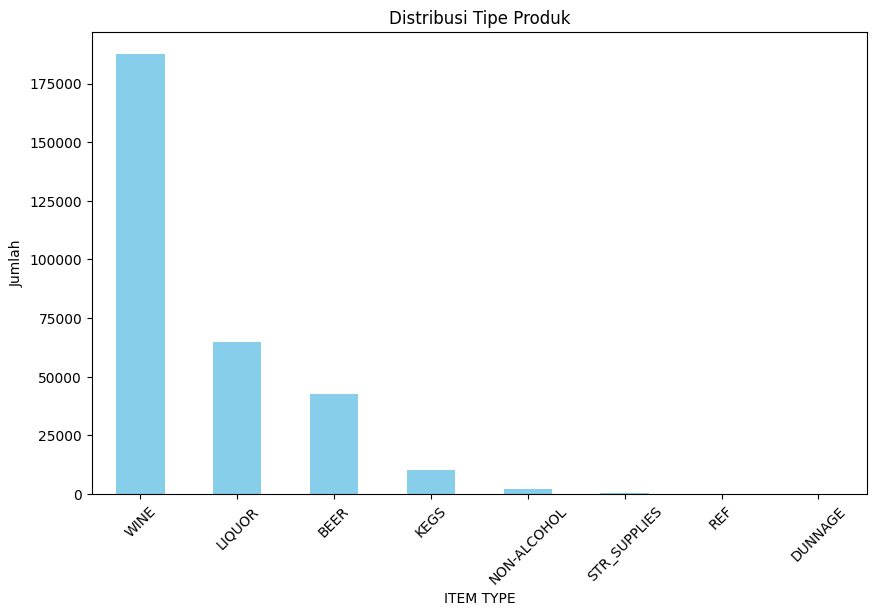

In [ ]:
# Cek nilai unik dan distribusi
print("SUPPLIER Unique Values:", df['SUPPLIER'].nunique())
print("\nITEM TYPE Distribution:")
print(df['ITEM TYPE'].value_counts(normalize=True)*100)


plt.figure(figsize=(10,6))
df['ITEM TYPE'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribusi Tipe Produk')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

**Observasi**

ITEM TYPE menggunakan one-hot encoding karena kolom ini hanya memiliki 8 kategori unik yang berbeda dan tidak ada hubungan urutan atau hierarki di antara kategorinya.

SUPPLIER menggunakan frequency encoding karena kolom ini memiliki 396 nilai unik yang berbeda, yang termasuk dalam kategori kardinalitas tinggi.

In [15]:
# One-Hot Encoding untuk ITEM TYPE
df = pd.get_dummies(df, columns=['ITEM TYPE'], prefix='Type')

# Frequency Encoding untuk SUPPLIER
supplier_freq = df['SUPPLIER'].value_counts(normalize=True)
df['SUPPLIER_FREQ'] = df['SUPPLIER'].map(supplier_freq)

# Hasil encoding
print(df[['SUPPLIER', 'SUPPLIER_FREQ']].head())

                            SUPPLIER  SUPPLIER_FREQ
0  REPUBLIC NATIONAL DISTRIBUTING CO       0.068244
1                          PWSWN INC       0.009410
2            RELIABLE CHURCHILL LLLP       0.022659
3          LANTERNA DISTRIBUTORS INC       0.011718
4               DIONYSOS IMPORTS INC       0.013590


In [ ]:
# Cek nilai unik setelah encoding
print("\nSetelah Encoding:")
print("Kolom Baru:", list(df.filter(like='Type_').columns))
print("SUPPLIER_FREQ Range:", df['SUPPLIER_FREQ'].min(), "-", df['SUPPLIER_FREQ'].max())


Setelah Encoding:
Kolom Baru: ['Type_BEER', 'Type_DUNNAGE', 'Type_KEGS', 'Type_LIQUOR', 'Type_NON-ALCOHOL', 'Type_REF', 'Type_STR_SUPPLIES', 'Type_WINE']
SUPPLIER_FREQ Range: 3.250499764338767e-06 - 0.06824424255229242


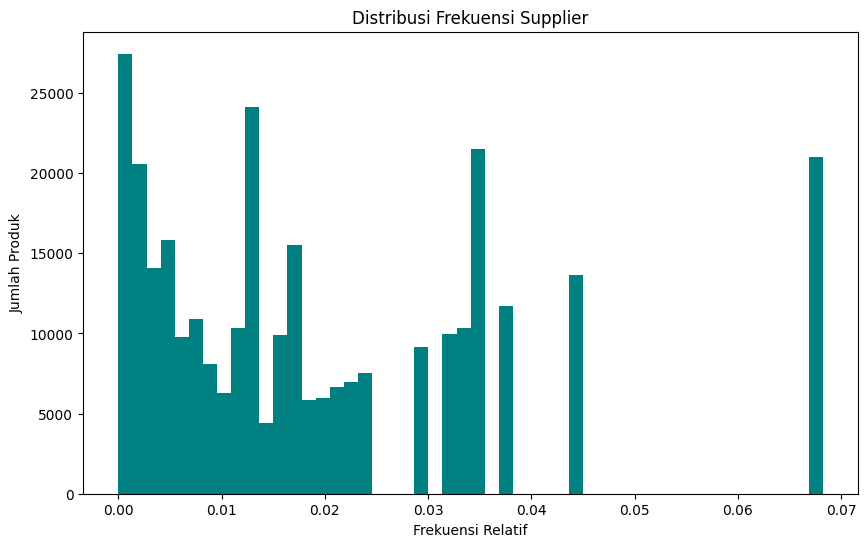

In [ ]:
# Visualisasi hasil frequency encoding
plt.figure(figsize=(10,6))
plt.hist(df['SUPPLIER_FREQ'], bins=50, color='teal')
plt.title('Distribusi Frekuensi Supplier')
plt.xlabel('Frekuensi Relatif')
plt.ylabel('Jumlah Produk')
plt.show()

In [16]:
print("\nMissing Value Setelah Encoding:")
print(df.isnull().sum())


Missing Value Setelah Encoding:
YEAR                 0
MONTH                0
SUPPLIER             0
ITEM CODE            0
ITEM DESCRIPTION     0
RETAIL SALES         0
RETAIL TRANSFERS     0
WAREHOUSE SALES      0
Type_BEER            0
Type_DUNNAGE         0
Type_KEGS            0
Type_LIQUOR          0
Type_NON-ALCOHOL     0
Type_REF             0
Type_STR_SUPPLIES    0
Type_WINE            0
SUPPLIER_FREQ        0
dtype: int64
